In [78]:
# import necessary libraries to begin with

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import processed data into one dataframe

df = pd.concat(map(pd.read_csv, ["https://raw.githubusercontent.com/EmberAnimus/DSC450/9b3b2d9d350078f3ae5b12fc9fc82300a5b88233/Project%203%20-%20SBA%20Data/processed-data/0.csv",
                                 "https://raw.githubusercontent.com/EmberAnimus/DSC450/9b3b2d9d350078f3ae5b12fc9fc82300a5b88233/Project%203%20-%20SBA%20Data/processed-data/1.csv"]),
                                  ignore_index=True)


df

,BankName,GrossApproval,ApprovalDate,ApprovalFiscalYear,InitialInterestRate,TermInMonths,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,CIBM Bank,330000,1990-10-01,1991,6.54,84,CORPORATION,1,PIF,2005-07-31,0,0,0
1,BMO Harris Bank National Association,98900,1990-10-01,1991,6.54,11,CORPORATION,1,PIF,2005-07-31,0,0,0
2,MISSINGMAINBANKID,120000,1990-10-01,1991,6.54,240,CORPORATION,1,CANCLD,NaN,0,0,0
3,"U.S. Bank, National Association",250000,1990-10-01,1991,6.54,48,CORPORATION,1,PIF,2005-07-31,0,0,0
4,Manufacturers and Traders Trust Company,33500,1990-10-01,1991,6.54,84,CORPORATION,1,PIF,2005-07-31,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755605,The Vinton County National Bank,1847600,2023-06-30,2023,6.99,120,CORPORATION,2,COMMIT,NaN,0,0,77
1755606,"Community Banks of Colorado, A Division of",224800,2023-06-30,2023,9.75,180,CORPORATION,2,COMMIT,NaN,0,0,0
1755607,State Savings Bank,350000,2023-06-30,2023,9.50,120,CORPORATION,1,COMMIT,NaN,0,0,4
1755608,Mission Valley Bank,280700,2023-06-30,2023,11.00,120,CORPORATION,2,CANCLD,NaN,0,0,6


In [79]:
# cleaning the BusinessType column to not have two different entries for 'Individual'

df.loc[df["BusinessType"] == "Individual", "BusinessType"] = "INDIVIDUAL"

In [80]:
df.BusinessType.unique()

array(['CORPORATION', 'INDIVIDUAL', 'PARTNERSHIP'], dtype=object)

In [81]:
# get a quick snapshot of the summary statistics of our data

df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,GrossApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,BusinessAge,GrossChargeOffAmount,RevolverStatus,JobsSupported
count,1755610.000000,1755610.000000,1755610.000000,1755610.000000,1755610.000000,1755610.000000,1755610.000000,1755610.000000
mean,286517.849589,2007.879918,6.577298,114.743535,1.093071,12360.987425,0.252533,7.788571
std,536508.776973,8.507159,1.155749,77.998548,0.440004,72501.106151,0.434465,27.514746
min,0.000000,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35000.000000,2002.000000,6.350000,63.000000,1.000000,0.000000,0.000000,0.000000
50%,100000.000000,2007.000000,6.540000,84.000000,1.000000,0.000000,0.000000,3.000000
75%,299500.000000,2015.000000,6.540000,120.000000,1.000000,0.000000,1.000000,8.000000
max,5000000.000000,2023.000000,56.000000,847.000000,5.000000,4706180.000000,1.000000,9500.000000


In [82]:
# create new dataframe that only contains rows with loans that are either Paid in Full (PIF) or Charged Off (CHGOFF) to use for our analysis

df_temp = df.loc[df['LoanStatus'].isin(["PIF", "CHGOFF"])].reset_index()
df_temp.drop(['index'], axis="columns", inplace=True)
df_temp

,BankName,GrossApproval,ApprovalDate,ApprovalFiscalYear,InitialInterestRate,TermInMonths,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,CIBM Bank,330000,1990-10-01,1991,6.54,84,CORPORATION,1,PIF,2005-07-31,0,0,0
1,BMO Harris Bank National Association,98900,1990-10-01,1991,6.54,11,CORPORATION,1,PIF,2005-07-31,0,0,0
2,"U.S. Bank, National Association",250000,1990-10-01,1991,6.54,48,CORPORATION,1,PIF,2005-07-31,0,0,0
3,Manufacturers and Traders Trust Company,33500,1990-10-01,1991,6.54,84,CORPORATION,1,PIF,2005-07-31,0,0,0
4,"U.S. Bank, National Association",43000,1990-10-01,1991,6.54,116,INDIVIDUAL,1,PIF,2005-07-31,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272846,GBC International Bank,350000,2023-03-28,2023,9.25,12,CORPORATION,2,PIF,2023-05-31,0,0,35
1272847,DreamSpring,75000,2023-04-06,2023,14.00,120,CORPORATION,2,PIF,2023-04-30,0,0,3
1272848,United Community Bank,390000,2023-04-06,2023,10.50,126,CORPORATION,0,PIF,2023-05-31,0,0,4
1272849,"Bank of America, National Association",250000,2023-04-14,2023,7.32,84,CORPORATION,2,PIF,2023-05-31,0,0,30


In [83]:
# encoding BusinessType and LoanStatus from categorical to indicator columns

df2 = pd.get_dummies(df_temp, columns=['BusinessType'], prefix="BusinessType")
encoded_data = pd.get_dummies(df2, columns=['LoanStatus'], prefix="LoanStatus")
encoded_data

,BankName,GrossApproval,ApprovalDate,ApprovalFiscalYear,InitialInterestRate,TermInMonths,BusinessAge,PaidInFullDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP,LoanStatus_CHGOFF,LoanStatus_PIF
0,CIBM Bank,330000,1990-10-01,1991,6.54,84,1,2005-07-31,0,0,0,1,0,0,0,1
1,BMO Harris Bank National Association,98900,1990-10-01,1991,6.54,11,1,2005-07-31,0,0,0,1,0,0,0,1
2,"U.S. Bank, National Association",250000,1990-10-01,1991,6.54,48,1,2005-07-31,0,0,0,1,0,0,0,1
3,Manufacturers and Traders Trust Company,33500,1990-10-01,1991,6.54,84,1,2005-07-31,0,0,0,1,0,0,0,1
4,"U.S. Bank, National Association",43000,1990-10-01,1991,6.54,116,1,2005-07-31,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272846,GBC International Bank,350000,2023-03-28,2023,9.25,12,2,2023-05-31,0,0,35,1,0,0,0,1
1272847,DreamSpring,75000,2023-04-06,2023,14.00,120,2,2023-04-30,0,0,3,1,0,0,0,1
1272848,United Community Bank,390000,2023-04-06,2023,10.50,126,0,2023-05-31,0,0,4,1,0,0,0,1
1272849,"Bank of America, National Association",250000,2023-04-14,2023,7.32,84,2,2023-05-31,0,0,30,1,0,0,0,1


In [84]:
# get a look at what remaining columns we need to consider and/or update

encoded_data.dtypes

BankName                     object
GrossApproval                 int64
ApprovalDate                 object
ApprovalFiscalYear            int64
InitialInterestRate         float64
TermInMonths                  int64
BusinessAge                   int64
PaidInFullDate               object
GrossChargeOffAmount          int64
RevolverStatus                int64
JobsSupported                 int64
BusinessType_CORPORATION      uint8
BusinessType_INDIVIDUAL       uint8
BusinessType_PARTNERSHIP      uint8
LoanStatus_CHGOFF             uint8
LoanStatus_PIF                uint8
dtype: object

<Axes: >

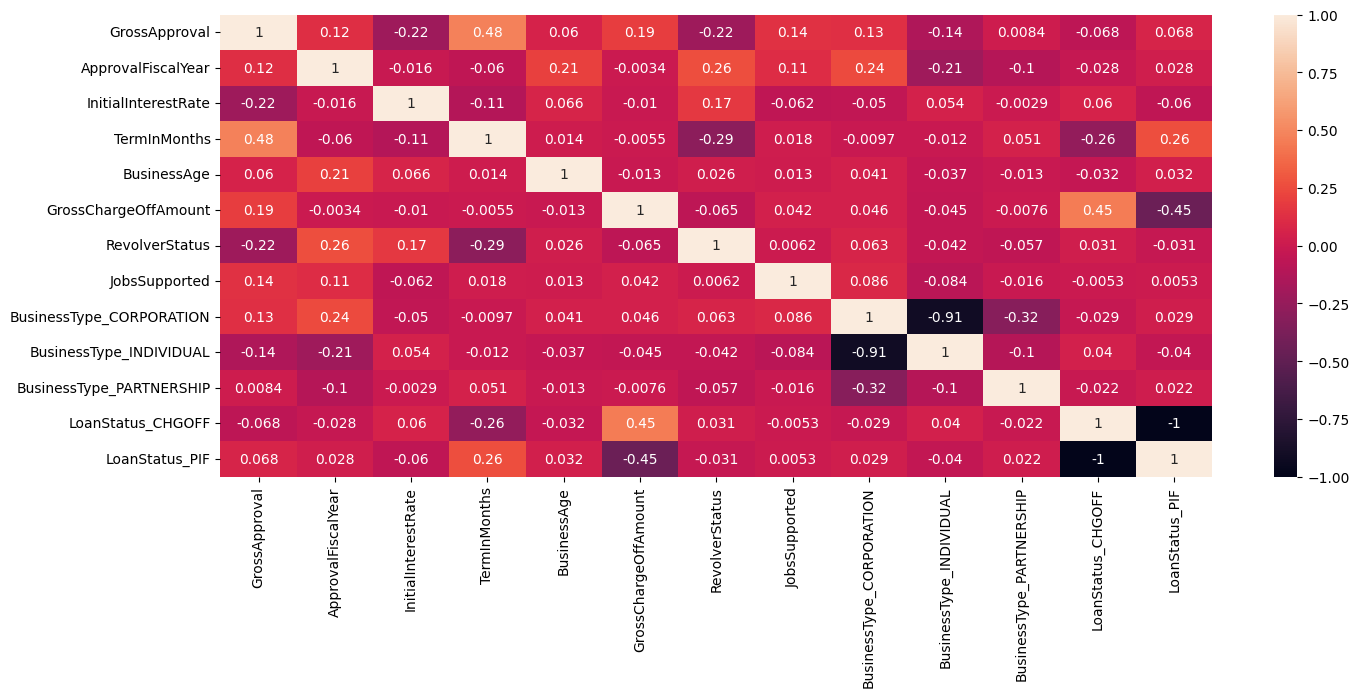

In [85]:
# visualize our pairwise correlations using the Pearson method

plt.figure(figsize=(16, 6))
sns.heatmap(encoded_data.corr(numeric_only=True), annot=True)

In [86]:
# get counts of Paid in Full (0) vs Charged Off (1) loans in our dataset

encoded_data["LoanStatus_CHGOFF"].value_counts()

0    1061787
1     211064
Name: LoanStatus_CHGOFF, dtype: int64

As

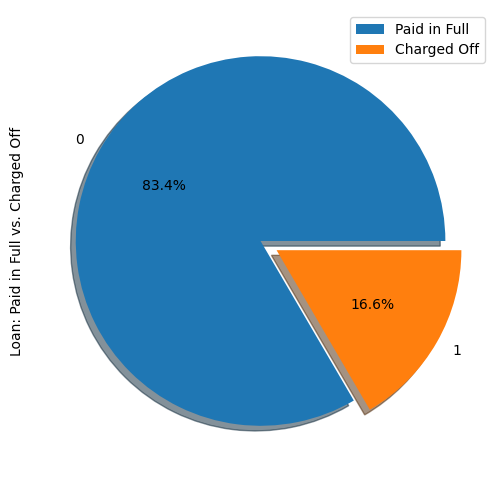

In [87]:
# create a visualization to show the imbalance in the data of Paid in Full vs. Charged Off entries

def show_loan_distrib(data):
  count = ""
  if isinstance(data, pd.DataFrame):
      count = data["LoanStatus_CHGOFF"].value_counts()
  else:
      count = data.value_counts()


  count.plot(kind = 'pie', explode = [0, 0.1],

              figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
  plt.ylabel("Loan: Paid in Full vs. Charged Off")
  plt.legend(["Paid in Full", "Charged Off"])
  plt.show()


# Visualize the proportion of borrowers
show_loan_distrib(encoded_data)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

X_df = encoded_data.drop(["BankName", "ApprovalDate", "PaidInFullDate", "GrossChargeOffAmount", "RevolverStatus", "LoanStatus_CHGOFF", "LoanStatus_PIF"], axis = 1)
y_df = encoded_data["LoanStatus_PIF"]

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.30, random_state=2022)


In [89]:
# it is clear that we have an imbalance in the data so that needs to be handled in some way

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (890995, 9)
Number transactions y_train dataset:  (890995,)
Number transactions X_test dataset:  (381856, 9)
Number transactions y_test dataset:  (381856,)


In [90]:
# let's first train the model to see the imbalanced results

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  1415  62111]
 [  2144 316186]]
              precision    recall  f1-score   support

           0       0.40      0.02      0.04     63526
           1       0.84      0.99      0.91    318330

    accuracy                           0.83    381856
   macro avg       0.62      0.51      0.47    381856
weighted avg       0.76      0.83      0.76    381856



Our accuracy of 83% is great to begin with, however, there is a clear imbalance reflected in the recall scores.

In [91]:
# using SMOTE over-sampling method to handle for our imbalance

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 743457
Before OverSampling, counts of label '0': 147538 

After OverSampling, the shape of train_X: (1486914, 9)
After OverSampling, the shape of train_y: (1486914,) 

After OverSampling, counts of label '1': 743457
After OverSampling, counts of label '0': 743457


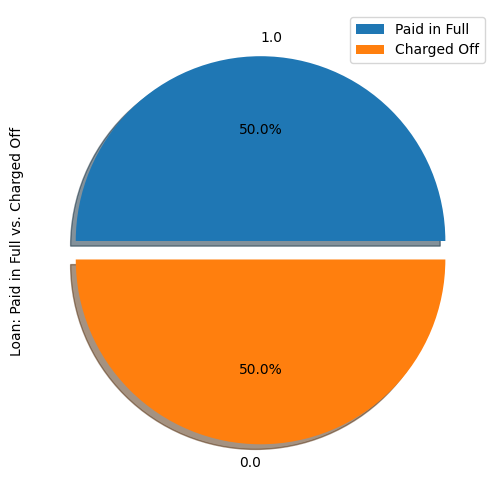

In [92]:
# visualize that our over-sampling is now 50/50

column = ['LoanStatus_CHGOFF']
y_train_res_df = pd.DataFrame(data = y_train_res, columns = column)

data_oversample = pd.concat([X_train_res, y_train_res_df], axis = 0)
show_loan_distrib(data_oversample)

In [93]:
# run the model again with the over-sampled training data

model2 = LogisticRegression()
model2.fit(X_train_res, y_train_res.ravel())
predictions = model2.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.35      0.79      0.49     63526
           1       0.94      0.71      0.81    318330

    accuracy                           0.72    381856
   macro avg       0.65      0.75      0.65    381856
weighted avg       0.85      0.72      0.76    381856



The accuracy of this model lowered from the previous one 83% to 72% however the recall value of the minority class has improved drastically. This model is considered better than the first because of the improvement in the recall.

In [94]:
# using NearMiss under-sampling

from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, the shape of train_X: (295076, 9)
After Undersampling, the shape of train_y: (295076,) 

After Undersampling, counts of label '1': 147538
After Undersampling, counts of label '0': 147538


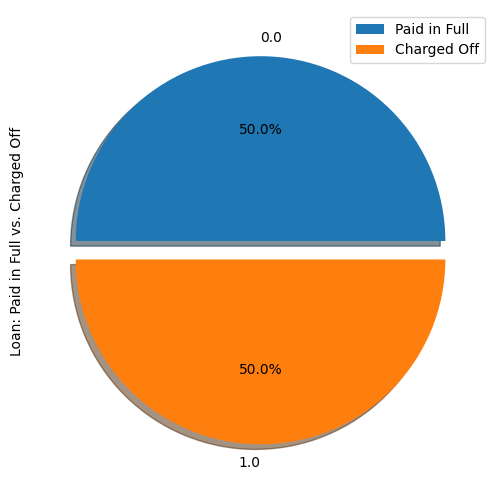

In [95]:
# visualize that our under-sampling data is now 50/50

column = ['LoanStatus_CHGOFF']
y_train_miss_df = pd.DataFrame(data = y_train_miss, columns = column)

data_undersample = pd.concat([X_train_miss, y_train_miss_df], axis = 0)
show_loan_distrib(data_undersample)

In [96]:
# run the model against the under-sampled training data

model3 = LogisticRegression()
model3.fit(X_train_miss, y_train_miss.ravel())
predictions = model3.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.23      0.63      0.34     63526
           1       0.89      0.58      0.70    318330

    accuracy                           0.59    381856
   macro avg       0.56      0.61      0.52    381856
weighted avg       0.78      0.59      0.64    381856



This model improves the recall just as nearly as well as when using the SMOTE training data, however, the accuracy isn't as good. As a result, it appears our best model is the one using the over-sampled training data. Let's examine a bit further the results from model 2.

In [97]:
print(model2.coef_, model2.intercept_)

[[-9.51332835e-07 -6.83276112e-04 -4.88829964e-04  1.86334655e-02
   1.32613818e-04  5.16074311e-03  4.83665565e-04  1.33295086e-04
   9.59696755e-05]] [-2.72085746e-06]


In [98]:
model2_results = pd.DataFrame(zip(X_train.columns, np.transpose(model2.coef_)), columns=['Features', 'Coefficients'])
model2_results

,Features,Coefficients
0,GrossApproval,[-9.513328349084398e-07]
1,ApprovalFiscalYear,[-0.0006832761123045732]
2,InitialInterestRate,[-0.00048882996362799]
3,TermInMonths,[0.018633465474012442]
4,BusinessAge,[0.0001326138183780461]
5,JobsSupported,[0.005160743105844495]
6,BusinessType_CORPORATION,[0.00048366556472206613]
7,BusinessType_INDIVIDUAL,[0.00013329508592655433]
8,BusinessType_PARTNERSHIP,[9.596967552235958e-05]


In [100]:
score = model2.score(X_train_res, y_train_res.ravel())
print(score)

0.7523030921761447


In [104]:
import math

w0 = model2.intercept_[0]
w = model2.coef_[0]
feature_names = X_train_res.columns.to_list()

feature_importance = pd.DataFrame(feature_names, columns = ["Features"])
feature_importance["Importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["Importance"], ascending=False)

feature_importance

,Features,Importance
3,TermInMonths,1.018808
5,JobsSupported,1.005174
6,BusinessType_CORPORATION,1.000484
7,BusinessType_INDIVIDUAL,1.000133
4,BusinessAge,1.000133
8,BusinessType_PARTNERSHIP,1.000096
0,GrossApproval,0.999999
2,InitialInterestRate,0.999511
1,ApprovalFiscalYear,0.999317
